<a href="https://colab.research.google.com/github/aparnavinayankozhipuram/Mistral-7B-Evaluation/blob/main/Copy_of_LexicalSimilarityscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

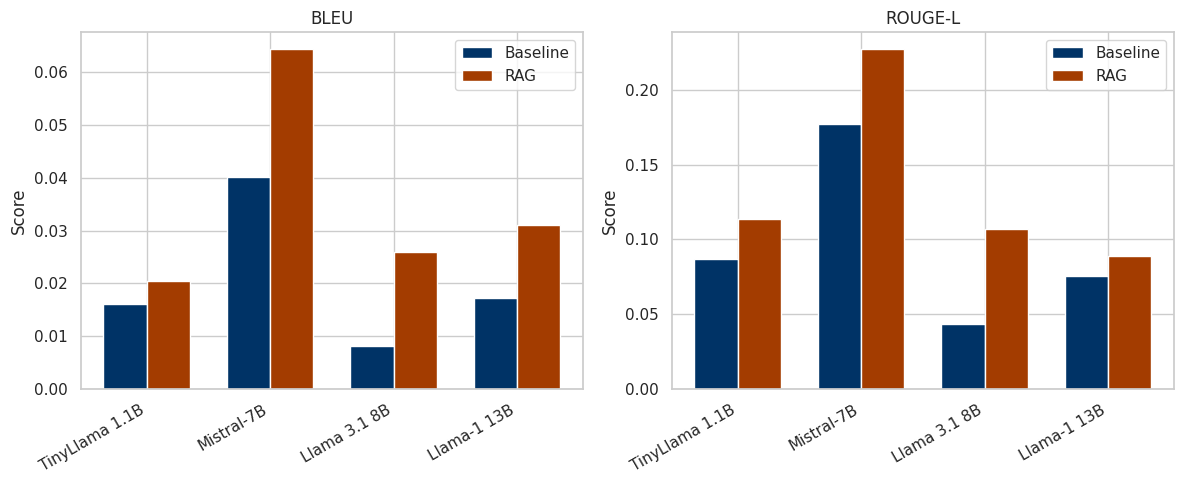

In [ ]:
#import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(style='whitegrid')
models=['TinyLlama 1.1B','Mistral-7B','Llama 3.1 8B','Llama-1 13B']
base_bleu=[0.0160504,0.0400714,0.0081942,0.0172173]
rag_bleu =[0.020489,0.064307,0.02597,0.03108]
base_rl  =[0.08723991,0.17752396,0.043703,0.0752895]
rag_rl   =[0.113838,0.227196,0.1071223,0.089]

records=[]
for m,bb,rb,brl,rrl in zip(models,base_bleu,rag_bleu,base_rl,rag_rl):
    records.append({'Model':m,'Metric':'BLEU','System':'Baseline','Score':bb})
    records.append({'Model':m,'Metric':'BLEU','System':'RAG','Score':rb})
    records.append({'Model':m,'Metric':'ROUGE-L','System':'Baseline','Score':brl})
    records.append({'Model':m,'Metric':'ROUGE-L','System':'RAG','Score':rrl})
plot_df=pd.DataFrame(records)

fig,axes=plt.subplots(1,2,figsize=(12,5))
colors={'Baseline':'#003366','RAG':'#A33C00'}  # darker blue and darker orange
width=0.35
for ax,metric in zip(axes,['BLEU','ROUGE-L']):
    sel=plot_df[plot_df['Metric']==metric]
    pivot=sel.pivot(index='Model',columns='System',values='Score').reindex(models)
    x=range(len(models))
    ax.bar([p-width/2 for p in x],pivot['Baseline'],width,color=colors['Baseline'],label='Baseline')
    ax.bar([p+width/2 for p in x],pivot['RAG'],width,color=colors['RAG'],label='RAG')
    ax.set_xticks(x)
    ax.set_xticklabels(models,rotation=30,ha='right')
    ax.set_ylabel('Score')
    ax.set_title(metric)
    ax.legend()

plt.tight_layout()
plt.show()